<a href="https://colab.research.google.com/github/mardzyuba/Faker/blob/master/lesson_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1

2. На основе переменной quality с оценками вина создать новую переменную good: если quality > 5, то 1, иначе 0.

---



In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
wine_info = pd.read_csv('/content/sample_data/winequality-red.csv', sep = ';')

wine_info.head(100)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.7,0.600,0.17,2.3,0.058,17.0,106.0,0.9932,3.85,0.60,12.9,6
96,6.8,0.775,0.00,3.0,0.102,8.0,23.0,0.9965,3.45,0.56,10.7,5
97,7.0,0.500,0.25,2.0,0.070,3.0,22.0,0.9963,3.25,0.63,9.2,5
98,7.6,0.900,0.06,2.5,0.079,5.0,10.0,0.9967,3.39,0.56,9.8,5


fixed acidity - фиксированная кислотность volatile acidity - летучая кислотность citric acid - лимонная кислота residual sugar - остаточный сахар chlorides - хлориды free sulfur dioxide - свободный диоксид серы total sulfur dioxide - общий диоксид серы density - плотность sulphates - сульфаты

In [3]:
wine_info.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [5]:
def rule(x):
    if x > 5:
         return 1
    else:
         return 0

wine_info['good'] = wine_info.apply(lambda x: rule(x['quality']), axis =  1)

In [6]:
wine_info.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
good                      2
dtype: int64


# Задание 3

Исследовать, какие химические характеристики вина влияют на то, окажется оно хорошим или плохим,  с применением не менее 5 диаграмм из урока.

---



1.Начнем с графика коррелиции, чтобы выявить связи "качество" с химическими характеристиками.

In [7]:
correlation = wine_info.corr()
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.095093
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.321441
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.159129
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,-0.002160
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.109494
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.061757
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,-0.231963
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.159110
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.003264
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.218072


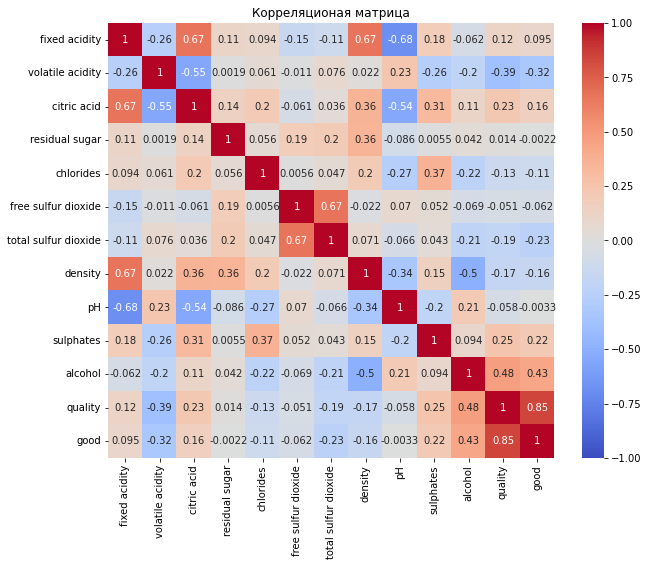

In [10]:
import numpy as np

plt.figure(figsize = (10,8))

matrix = np.triu(correlation)
sns.heatmap(correlation, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

plt.title('Корреляционая матрица')
plt.show()

По матрице, можно заметить, что наиболее близкие совпадения, а именно, значения близкие к 1 и -1 с:
- alcohol - спирт(алкоголь) **0.48**
-  volatile acidity - летучая кислотность **-0.39**
-  sulphates - сульфаты   **0.25**
- citric acid - лимонная кислота  **0.23**

---




Посмотрим соотношение этих характеристик на других графиках.

In [12]:
df_w = wine_info.groupby('quality')[['volatile acidity', 'citric acid', 'chlorides', 'density', 'sulphates', 'alcohol']].mean().reset_index()
df_w

,quality,volatile acidity,citric acid,chlorides,density,sulphates,alcohol
0,3,0.884500,0.171000,0.122500,0.997464,0.570000,9.955000
1,4,0.693962,0.174151,0.090679,0.996542,0.596415,10.265094
2,5,0.577041,0.243686,0.092736,0.997104,0.620969,9.899706
3,6,0.497484,0.273824,0.084956,0.996615,0.675329,10.629519
4,7,0.403920,0.375176,0.076588,0.996104,0.741256,11.465913
5,8,0.423333,0.391111,0.068444,0.995212,0.767778,12.094444


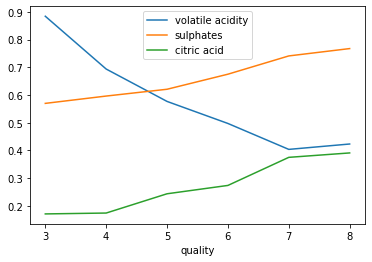

In [16]:
df_w.plot(x='quality', y=['volatile acidity', 'sulphates', 'citric acid'])


По графику №1 мы видим, что чем меньше содержание volatile acidity, тем лучше качество вина

График №2 sulphates по отношению к качеству менее волантилен, чем предыдущий, но содержание в вине, начиная от качества "5" растет.
 
 График №3 citric acid симметричен графику №1, т.е. на значении "4" график №1 снижается, а №3 растет, но они не пересекаются.

Соответсвенно, чем выше качество, тем ниже содержание volatile acidity (от 0.55 и до 0.41) и выше показатель citric acid (от 0.25 до 0.39)

---




Посмотрим зависимость между алкоголем и качеством, и сульфатами.

<Figure size 1296x864 with 0 Axes>

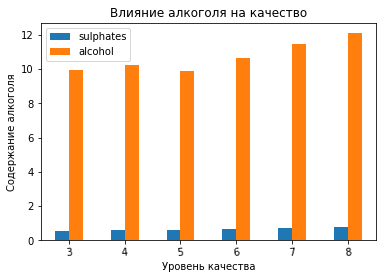

In [20]:
plt.figure(figsize = (18,12))
df_w.plot(x='quality', y=['sulphates', 'alcohol'],kind="bar")
plt.title('Влияние алкоголя на качество')
plt.xlabel('Уровень качества')
plt.ylabel('Содержание алкоголя')
plt.xticks(rotation = 5)

plt.show()

Из наблюдений можно сделать вывод, что сульфаты изменяются в соотношении с алкоголем (примерно 1:11), а высокое содержание алкоголя говорит и о повышенном качестве.

---



Также, по матрице корреляции можно расмотреть fixed acidity, т.к. он взаимосвязан с citric acid(взаимосвязь с качеством), density и pH.
Рассмотрим по общей таблице данных(без средних значений)     

<Figure size 800x640 with 0 Axes>

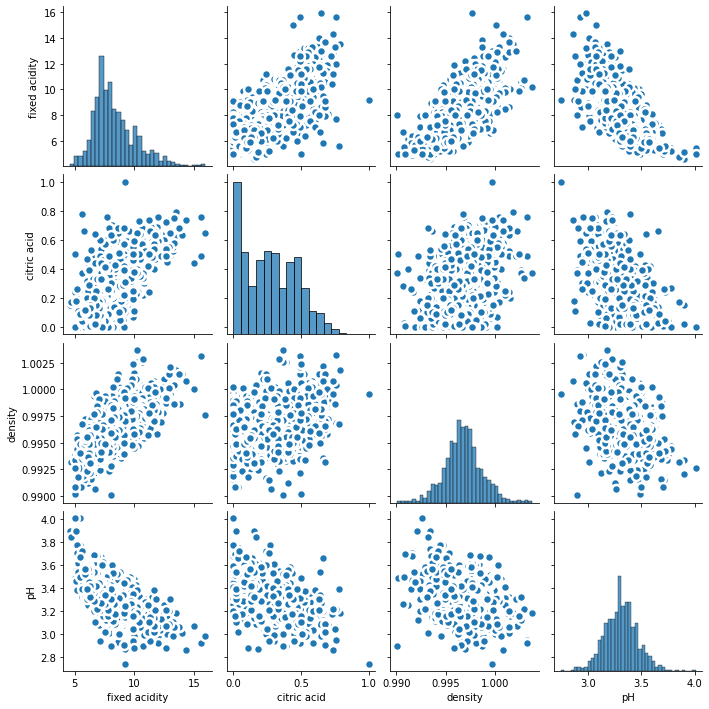

In [22]:
plt.figure(figsize=(10,8), dpi=80)
sns.pairplot(wine_info[['fixed acidity', 'citric acid', 'density', 'pH']], kind='scatter',  plot_kws=dict(s=80, edgecolor ='white', linewidth=2.5))

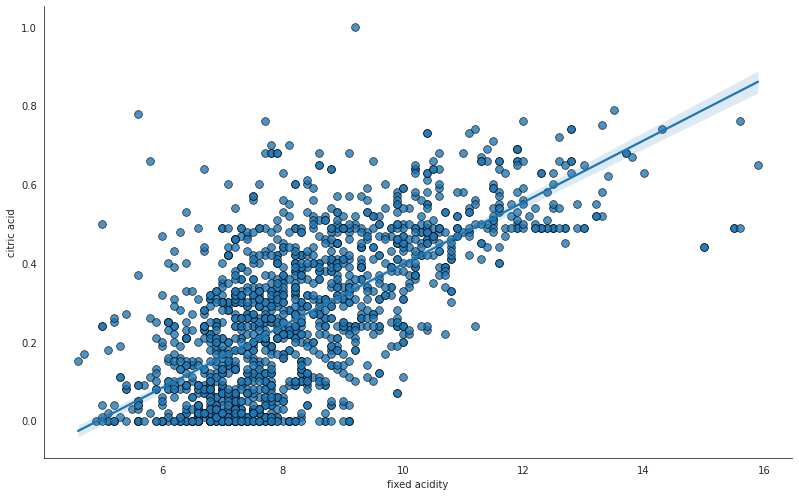

In [27]:
sns.set_style("white")
gridobj = sns.lmplot(x='fixed acidity', y='citric acid',  data= wine_info, 
                     height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))


plt.show()


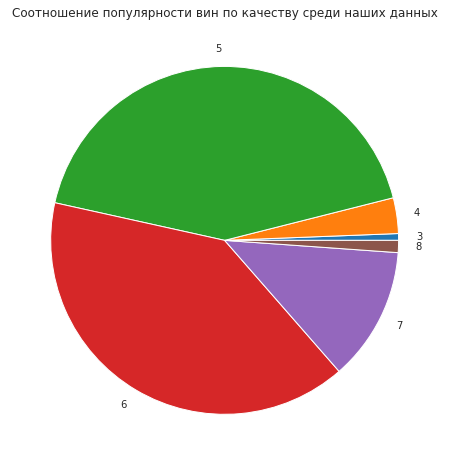

In [38]:
df = wine_info.groupby('quality').size()

# Make the plot with pandas
df.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("Соотношение популярности вин по качеству среди наших данных")
plt.ylabel("")
plt.show()
